In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np

from darkmod.utils import crop

plt.style.use("dark_background")
fontsize = 24  # General font size for all text
ticksize = 24  # tick size
plt.rcParams["font.size"] = fontsize
plt.rcParams["xtick.labelsize"] = ticksize
plt.rcParams["ytick.labelsize"] = ticksize

In [2]:
def load_peak_table(savedir, zis, reflections):
    """
    Load the peak table from a series of npz files.

    The output data table holds data from multiple simulations
    with both ground truth and reconstructed data.

    The filepath names are assumed to follow the patterns:
    reflection_1_zi_m1.npz, reflection_1_zi_1.npz ... etc
    (where m1 stands for zi=-1)

    Args:
        savedir (str): Directory where the data is saved
        zis (list): List of z values (e.g. [-1, 0, 1])
        reflections (list): List of reflections (e.g. [1, 2, 3, 4])

    Returns:
        data (np.array): Array of npz files of shape (4, 3).
            each data instance is a dictionary with keys.
    """
    data = np.empty((4, 3), dtype=object)
    for reflection in reflections:
        for zi in zis:
            if zi < 0:
                ss = "_zi_m" + str(np.abs(zi))
            else:
                ss = "_zi_" + str(zi)
            fname = "reflection_" + str(reflection) + ss
            file = os.path.join(savedir, fname + ".npz")
            data[reflection - 1, zi + 1] = np.load(file)
    return data


def load_scan(data, zi, reflection):
    """Load the strain-mosa scan from the data array.

    Args:
        data (npz dictionary): Data array instance from the npz file.
        zi (int): Index of the z value in the data array.
        reflection (int): Index of the reflection in the data array.

    Returns:
        scan (np.array): Strain-mosa scan of shape (m, n, o, p, q).
            first two dimensions are the pixel dimensions, and the last
            three dimensions are the strain-mosa dimensions (th, phi, chi).
    """
    d = data[reflection - 1, zi + 1]
    scan = np.zeros(d["strain_mosa_shape"], dtype=np.uint32).flatten()
    scan[d["sparse_indices"]] = d["strain_mosa_sparse"]
    scan = scan.reshape(d["strain_mosa_shape"])
    return scan


def show_sample_frame(data, zi, reflection):
    """Plot the central (angular) frame of the strain-mosa scan."""
    scan = load_scan(data, zi, reflection)
    m, n, o, p, q = scan.shape
    plt.style.use("dark_background")
    fig, ax = plt.subplots(1, 1, figsize=(10, 7))
    _s = scan[:, :, o // 2, p // 2, q // 2].astype(np.float32)
    mask = data[reflection - 1, zi + 1]["intensity_mask"]
    im = ax.imshow(crop(_s, mask), cmap="plasma", vmin=44000, vmax=54000)
    fig.colorbar(im, ax=ax, fraction=0.0235, pad=0.04)
    for spine in ax.spines.values():
        spine.set_visible(False)
    plt.title(
        "Reflection " + str(reflection) + " at zi = " + str(zi) + "   [arb. units]"
    )
    plt.xlabel("Pixel column")
    plt.ylabel("Pixel row")
    plt.tight_layout()
    plt.show()


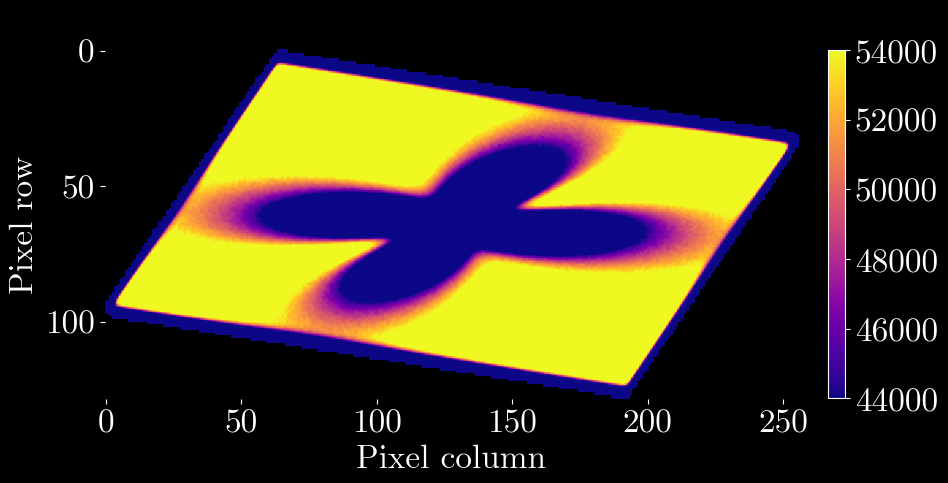

In [3]:
# Path to the directory in which reflections are stored
savedir = "/home/naxhe/workspace/darkmod/tests/end_to_end/defrec/saves/paper_1_run_3"
zis = [-1, 0, 1]
reflections = [1, 2, 3, 4]
# reflections = [2]
data = load_peak_table(savedir, zis, reflections)
show_sample_frame(data, zi=zis[0], reflection=reflections[0])


In [4]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams.update(matplotlib.rcParamsDefault)
plt.rcParams.update(
    {"text.usetex": False, "font.family": "serif", "font.serif": "Times New Roman"}
)


In [5]:
X.shape

NameError: name 'X' is not defined

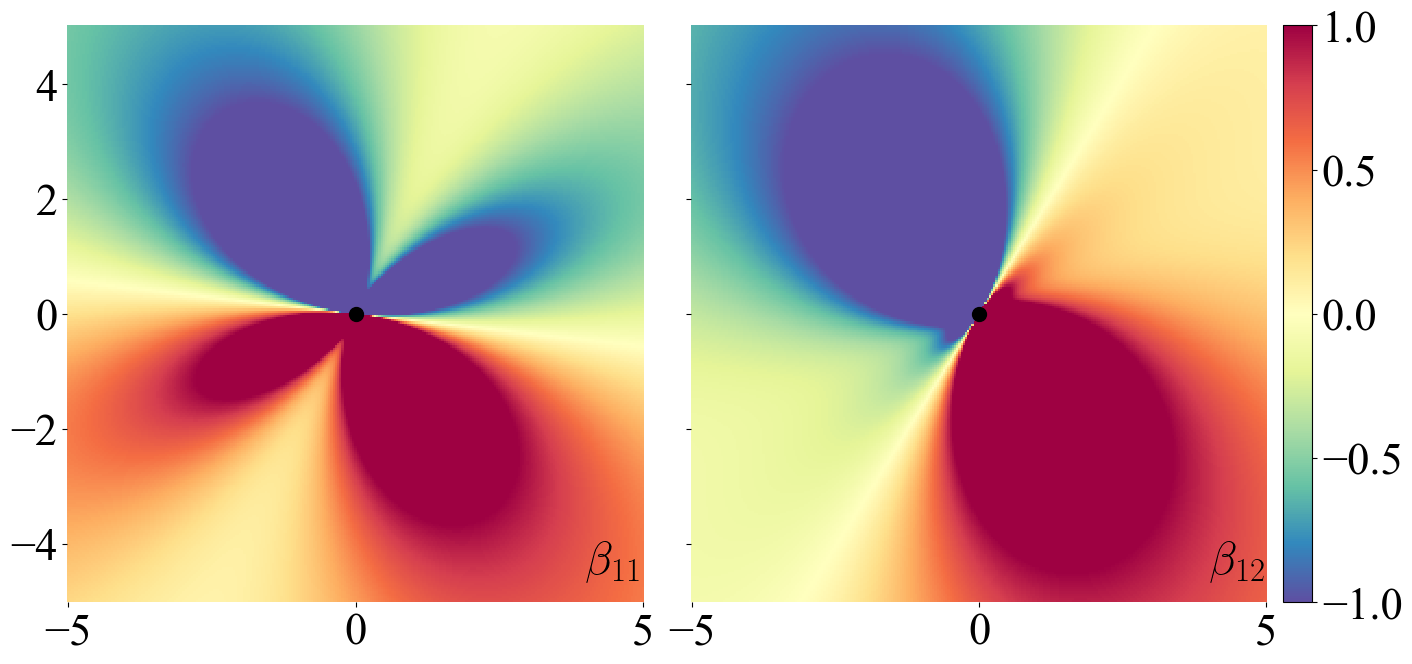

In [7]:
reflection = 1
zi = 0
d = data[reflection - 1, zi + 1]
beta = d["defgrad"]
for i in range(3):
    beta[..., i, i] -= 1


X, Y, Z = d["X"], d["Y"], d["Z"]
xx = X[:, :, X.shape[2] // 2]
yy = Y[:, :, Y.shape[2] // 2]

# plt.style.use("default")
fontsize = 32  # General font size for all text
ticksize = 32  # tick size
plt.rcParams["font.size"] = fontsize
plt.rcParams["xtick.labelsize"] = ticksize
plt.rcParams["ytick.labelsize"] = ticksize

plt.rcParams["font.family"] = "Times New Roman"

fig, ax = plt.subplots(
    1, 2, figsize=(14, 7), sharex=True, sharey=True, layout="compressed"
)
im = ax[0].pcolormesh(
    xx,
    yy,
    beta[:, :, X.shape[2] // 2, 0, 0] * 1e5,
    cmap="Spectral_r",
    shading="auto",
    vmin=-1,
    vmax=1,
)
ax[0].annotate(
    r"$\beta_{11}$", xy=(0.9, 0.05), xycoords="axes fraction", fontsize=fontsize + 2, usetex=True
)

ax[0].axes.set_aspect("equal")
#ax[0].set_xlabel(r"x [$\mu$m]")
#ax[0].set_ylabel(r"y [$\mu$m]")
for spine in ax[0].spines.values():
    spine.set_visible(False)
# cbar = fig.colorbar(im, ax=ax[0], fraction=0.0471, pad=0.01)

im = ax[1].pcolormesh(
    xx,
    yy,
    beta[:, :, X.shape[2] // 2, 1, 2] * 1e5,
    cmap="Spectral_r",
    shading="auto",
    vmin=-1,
    vmax=1,
)
ax[1].annotate(
    r"$\beta_{12}$", xy=(0.9, 0.05), xycoords="axes fraction", fontsize=fontsize + 2, usetex=True
)


for a in ax.flatten():
    a.scatter(0, 0, color="black", s=100)

ax[1].axes.set_aspect("equal")
#ax[1].set_xlabel(r"x")
for spine in ax[1].spines.values():
    spine.set_visible(False)
cbar = fig.colorbar(im, ax=ax[1], pad=0.01)
# plt.colorbar(im, ax=ax[1])
# cbar.set_label('[units of $10^{-5}$]', rotation=270)

plt.show()


In [6]:
import matplotlib as mpl

mpl.matplotlib_fname()

'/home/naxhe/anaconda3/envs/xrd/lib/python3.10/site-packages/matplotlib/mpl-data/matplotlibrc'